In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('Ecom.csv')
raw_data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [3]:
data = pd.DataFrame()
data['memb_len'] = raw_data['Length of Membership']
data['yr_spend'] = raw_data['Yearly Amount Spent']
data.head()

memb_len    yr_spend
0  4.082621  587.951054
1  2.664034  392.204933
2  4.104543  487.547505
3  3.120179  581.852344
4  4.446308  599.406092

<AxesSubplot:xlabel='memb_len', ylabel='yr_spend'>

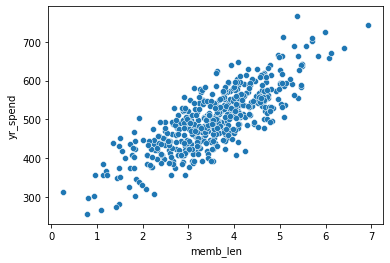

In [4]:
sns.scatterplot(x='memb_len', y = 'yr_spend', data = data)

In [5]:
X = data['memb_len']
Y = data['yr_spend']

In [6]:
def hyp_func(theta0, theta1, x1=X):
    return theta0 +(theta1*x1)

In [7]:
def cost_func(theta0,theta1,x=X,y=Y):
    n = len(x)
    total = sum(np.square(hyp_func(theta0=theta0, theta1=theta1, x1=x)-y))
    return (0.5*n)*total 

In [8]:
def update_vals(curr_theta0,curr_theta1,x,y, learning_rate):
    n = len(x)
    temp_theta0  = curr_theta0 - (learning_rate * ((1/n)*sum(hyp_func(curr_theta0,curr_theta1,x)-y)))
    temp_theta1 = curr_theta1 - (learning_rate * ((1/n)*sum((hyp_func(curr_theta0,curr_theta1,x)-y)*x)))
    return [ temp_theta0, temp_theta1]

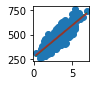

In [9]:
plt.figure(figsize=(1,1))


def linear_regression(X,Y,learning_rate,iterations, results=False):
    theta0 = 0 
    theta1 = 0    
    
    t0s = []
    t1s = []
    costs = [] 
    
    for i in range(0,iterations):
        t0s.append(theta0)
        t1s.append(theta1)
        costs.append(cost_func(theta0,theta1,X,Y))
        theta0, theta1 = update_vals(theta0,theta1,X,Y, learning_rate=learning_rate)
    
    res_df = pd.DataFrame()
    res_df['Theta0'] = t0s 
    res_df['Theta1'] = t1s
    res_df['Cost'] = costs
    
    if results:
        return res_df
    else:
        return theta0,theta1



final_theta0, final_theta1 = linear_regression(X,Y,0.05,1000,results=False)
results = linear_regression(X,Y,0.05,1000,results=True)

    
##iterations = 1000, learning_rate=0.05

Y_pred = hyp_func(final_theta0,final_theta1,X)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],alpha=0.5, c='green')

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, c='red', alpha=0.5)

plt.scatter(X,Y)


<AxesSubplot:xlabel='Theta0', ylabel='Theta1'>

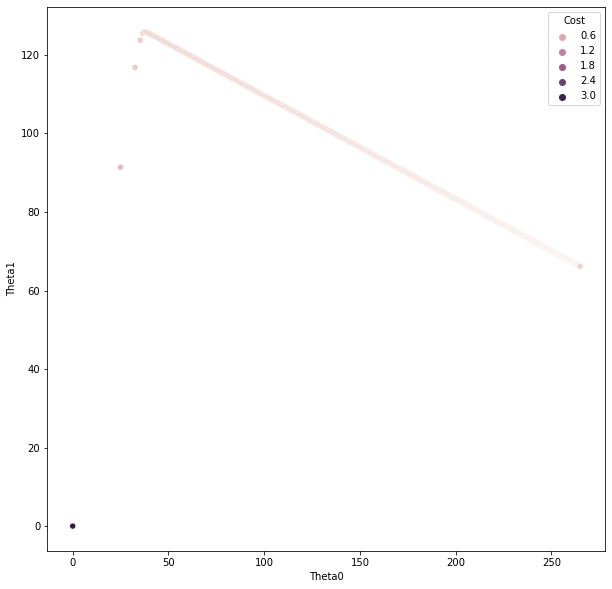

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Theta0',y = 'Theta1' , data=results,hue='Cost')

<AxesSubplot:xlabel='Theta0', ylabel='Theta1'>

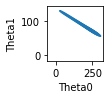

In [11]:
plt.figure(figsize=(1,1))
sns.kdeplot(x='Theta0',y = 'Theta1' , data=results)

In [12]:
results

Theta0      Theta1          Cost
0      0.000000    0.000000  3.194910e+10
1     24.965702   91.415231  3.226017e+09
2     32.532508  116.797104  9.810503e+08
3     35.236681  123.732321  8.025375e+08
4     36.580379  125.514785  7.853197e+08
..          ...         ...           ...
995  264.784391   66.224886  2.715869e+08
996  264.810719   66.217950  2.715832e+08
997  264.836956   66.211038  2.715795e+08
998  264.863102   66.204150  2.715758e+08
999  264.889158   66.197286  2.715722e+08

[1000 rows x 3 columns]

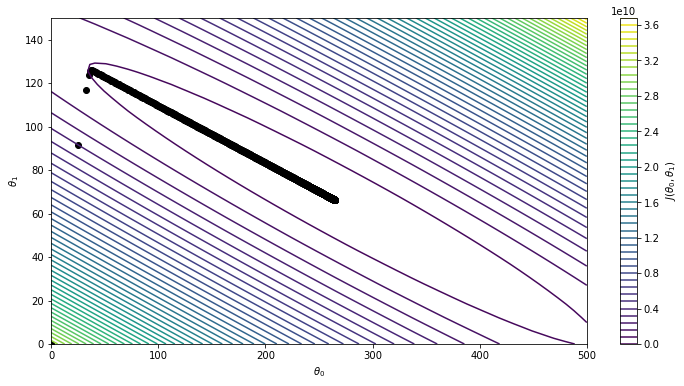

In [24]:
from itertools import product

def find_cost(d0,d1):
    c = []
    for i in range(len(d0)):
        c.append(cost_func(d0[i],d1[i],X,Y))
    return c

dat0 = np.linspace(0,500,50)
dat1 = np.linspace(0,150,50)

plot_df = pd.DataFrame(product(dat0, dat1), columns=['Theta0', 'Theta1'])

dat2 = find_cost(plot_df.Theta0,plot_df.Theta1)

plot_df['Cost'] = dat2


Cost_grid = plot_df.pivot_table(index='Theta0', columns='Theta1', values='Cost').T.values

Theta0_unique = np.sort(plot_df.Theta0.unique())
Theta1_unique = np.sort(plot_df.Theta1.unique())
Theta0_grid, Theta1_grid = np.meshgrid(Theta0_unique, Theta1_unique)

plt.figure(figsize=(12,6))
plt.contour(Theta0_grid, Theta1_grid, Cost_grid, levels=50)
plt.colorbar(label='$J(\\theta_0, \\theta_1)$')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')

plt.scatter(x='Theta0',y = 'Theta1' , data=results , c='black')

#sns.scatterplot(x= 'Theta0', y='Theta1', data = plot_df, hue='Cost')
#sns.scatterplot(x='Theta0',y = 'Theta1' , data=results,hue='Cost')